# Mercedes Benz Greener Manufacturing

### Goal of this project: Reduce the time a Mercedes-Benz spends on the test bench.

### Problem Statement

Since the first automobile, the Benz Patent Motor Car in 1886, Mercedes-Benz has stood for important automotive innovations. These include the passenger safety cell with a crumple zone, the airbag, and intelligent assistance systems. Mercedes-Benz applies for nearly 2000 patents per year, making the brand the European leader among premium carmakers. 

Mercedes-Benz is the leader in the premium car industry. With a huge selection of features and options, customers can choose the customized Mercedes-Benz of their dreams.

To ensure the safety and reliability of every unique car configuration before they hit the road, the company’s engineers have developed a robust testing system. As one of the world’s biggest manufacturers of premium cars, safety and efficiency are paramount on Mercedes-Benz’s production lines. However, optimizing the speed of their testing system for many possible feature combinations is complex and time-consuming without a powerful algorithmic approach.

Our end-goal is to reduce the time that cars spend on the test bench using model prediction.

In [1]:
__author__ = "Ovo Okpubuluku"
__email__ = "ovo@live.ca"

# Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, r2_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

### Create Data Class for Importing and reading Datasets

In [3]:
#For Mercedes Benz dataset
class Data:
    def __init__(self, train_data, test_data):
        
        '''loading dataframes'''
        
        self.train_data = train_data
        self.test_data = test_data
        self.process_data()
        
    def process_data(self):
        self._create_train_df()
        self._create_test_df()
        self._column_info()
        self._print_trainstats()
        self._print_teststats()
        self._check_duplicates()
                  
       
    def _create_train_df(self):
        '''loads and prepares train dataframe'''
        self.train_df = self._load_dataset(train_data)
        self.y_train = self.train_df['y'].values
        
    def _create_test_df(self):
        '''loads and encodes labels in test dataframe'''
        self.test_df = self._load_dataset(test_data)
        
    def _column_info(self):
        self.cat_cols = self._cat_cols(self.train_df)
        self.num_cols = self._num_cols(self.train_df)
        
    def _print_trainstats(self):
        print('  \n ----------Train Data Info---------')
        self.printstats(self.train_df)
        self._check_nan(self.train_df)
        
    def _print_teststats(self):
        print('  \n ----------Test Data Info---------')
        self.printstats(self.test_df)
        self._check_nan(self.test_df)
    
    def _load_dataset(self, file):
        return pd.read_csv(file)
    
    def printstats(self, df):
        print('---------------------------------------------------------')
        print('Shape of Dataframe - {}'.format(df.shape))
        print('---------------------------------------------------------')
        print('\n Dataframe Info: \n')
        print('n{}'.format(df.info()))
        print('---------------------------------------------------------')
        print(' Categorical Features Stats: \n \n{}'.format(df.describe(include='O')))
              
    def _check_nan(self, df):
        '''Checks and verifies presence of null values in Dataframe'''
        nan = np.sum(df.isna().sum())
        if nan == 0:
            print('\n\n : There are no null values in the dataframes')
        else:
            print('The following columns have null values\n\n{}'.format(df.isnull().sum()))
              
    def _cat_cols(self, df):
        '''finds and lists Categorical Columns in Dataframe'''
        self.cat_cols = df.select_dtypes(include=['O']).columns.tolist()
        print('Categorical Columns list: {}'.format(self.cat_cols))
        print('---------------------------------------------------------------------')
        return self.cat_cols
              
    def _num_cols(self, df):
        '''finds and lists Numerical Columns in Dataframe'''
        self.num_cols = df.select_dtypes(exclude=['O']).columns.tolist()
        return self.num_cols
              
              
    def _check_duplicates(self):
        '''Checks presence of duplicate entries'''
        print('\n : There are {} duplicate values in Train Data'.format(self.train_df.duplicated().sum()))
        print('\n : There are {} duplicate values in Test Data'.format(self.test_df.duplicated().sum()))

In [4]:
#Defining Dataset locations for upload
train_data = './train.csv'
test_data = './test.csv'

#Reading the Datasets
data = Data(train_data, test_data)

Categorical Columns list: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
---------------------------------------------------------------------
  
 ----------Train Data Info---------
---------------------------------------------------------
Shape of Dataframe - (4209, 378)
---------------------------------------------------------

 Dataframe Info: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB
nNone
---------------------------------------------------------
 Categorical Features Stats: 
 
          X0    X1    X2    X3    X4    X5    X6    X8
count   4209  4209  4209  4209  4209  4209  4209  4209
unique    47    27    44     7     4    29    12    25
top        z    aa    as     c     d     w     g     j
freq     360   833  1659  1942  4205   231  1042   277


 : There are no null values in the dataframes
  
 ----------Test Data Info---------
------------------

## Exploratory Data Analysis

Below is an overview of the Train and Test Dataframes:

In [5]:
print(data.train_df.shape)
data.train_df.head()

(4209, 378)


,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [6]:
print(data.test_df.shape)
data.test_df.head()

(4209, 377)


,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


Here, we see the Train Dataframe containing 376 Features, along with the Target Label (y) and an identifier (ID). Nine of these features (X0 - X8 are categorical, whilst the rest are binary features.

## Create Plots Class for Visualizations

Here we write a class to create visualizations to closely examine the data.

In [7]:
class Plots:
    '''For taking a closer look at the Target Column(y)'''
    sns.set(style="darkgrid")
    
    def __init__(self, data):
        self.data = data
        self.train_df = data.train_df
        self.test_df = data.test_df
        self.cat_cols = data.cat_cols
        self.num_cols = data.num_cols
        self.y_train = data.y_train
        self.eda_process()
        
    def eda_process(self):
        self._distplot()
        self._lineplot()
        self._scatterplot()
        self._barplots()
        
    def _distplot(self):
        '''Creates Distribution Plots for Target Value'''
        plt.figure(figsize=(15, 5))
        sns.distplot(self.y_train, bins=100, color = 'purple')
        plt.xlabel('Target value (seconds)')
        plt.ylabel('Frequency')
        plt.title('Distribution of the target value', fontsize=15)
        print('min: {} max: {} mean: {} std: {}'.format(min(self.y_train), max(self.y_train),\
                                                        self.y_train.mean(), self.y_train.std()))
        print('Count of values above 200: {}'.format(np.sum(self.y_train > 200)))
        plt.show()
            
    def _lineplot(self):
        '''Creates Lineplot for Target'''
        plt.figure(figsize=(15, 5))
        plt.plot(self.y_train, color = 'green')
        plt.xlabel('Row ID')
        plt.ylabel('Target')
        plt.title('Change in target value over the dataset', fontsize=15)
        plt.show()

        plt.figure(figsize=(15, 5))
        plt.plot(self.y_train[:75], color ='green')
        plt.xlabel('ID')
        plt.ylabel('Target value')
        plt.title('Change in target value over the first 75 samples', fontsize=15)
        plt.show()
        
    def _scatterplot(self):
        '''Creates Scatterplot for Target'''
        plt.figure(figsize=(15,8))
        plt.scatter(range(self.y_train.shape[0]), np.sort(self.y_train), color='r')
        plt.xlabel('index')
        plt.ylabel('Target Value')
        plt.title('Scatterplot of sorted Target Values', fontsize=15)
        plt.show()
        
    def _barplots(self):
        for col in data.cat_cols:
            value_counts = self.train_df[col].value_counts()
            fig, ax = plt.subplots(figsize=(12, 5))
            plt.title('Categorical Feature {} - Cardinality {}'.format(col, len(np.unique(self.train_df[col]))))
            plt.xlabel('Feature')
            plt.ylabel('Counts')
            plt.bar(range(len(value_counts)), value_counts.values)
            ax.set_xticks(range(len(value_counts)))
            ax.set_xticklabels(value_counts.index, rotation='vertical')
            plt.tight_layout()
    

min: 72.11 max: 265.32 mean: 100.66931812782134 std: 12.6778749695168
Count of values above 200: 1


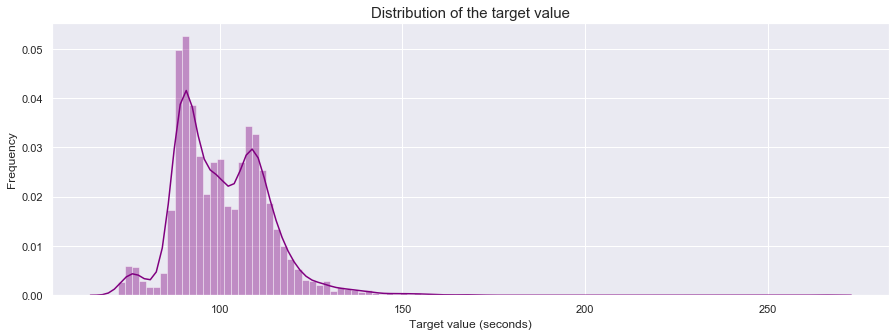

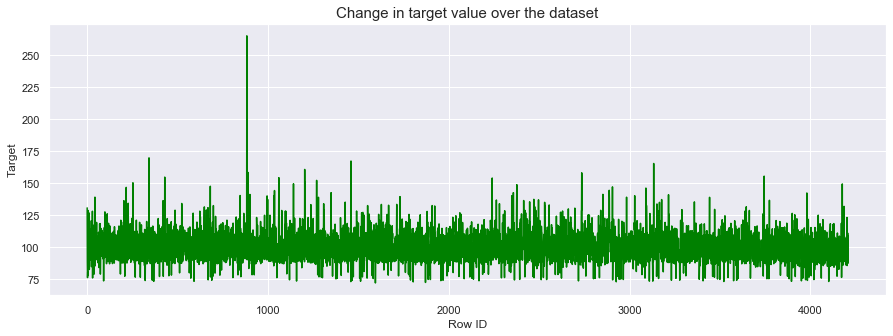

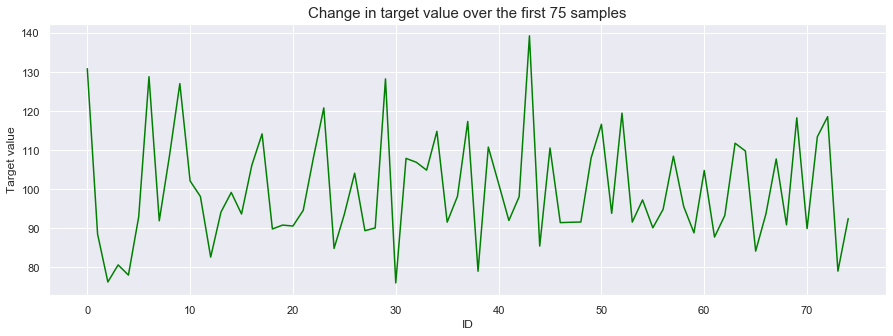

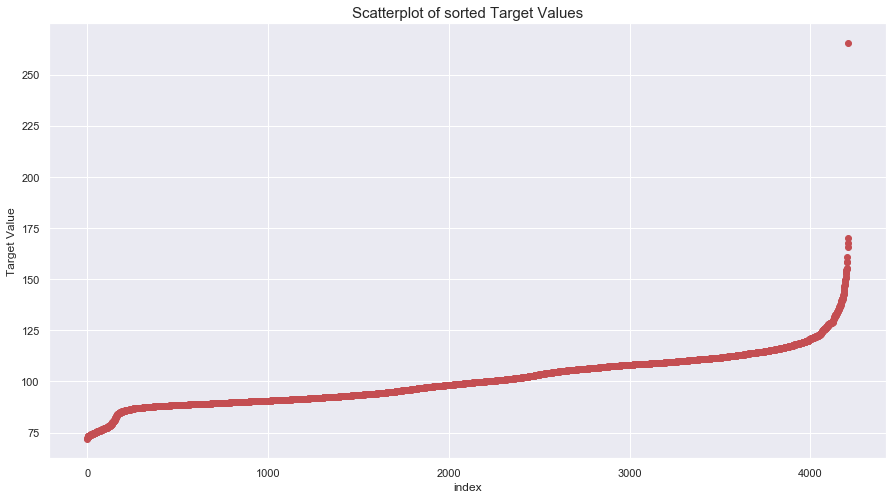

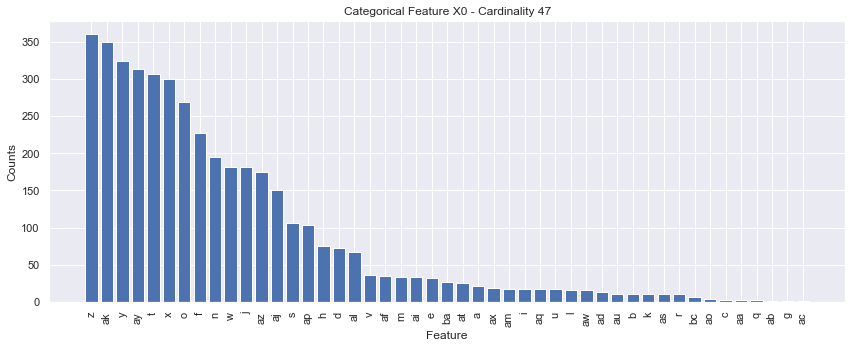

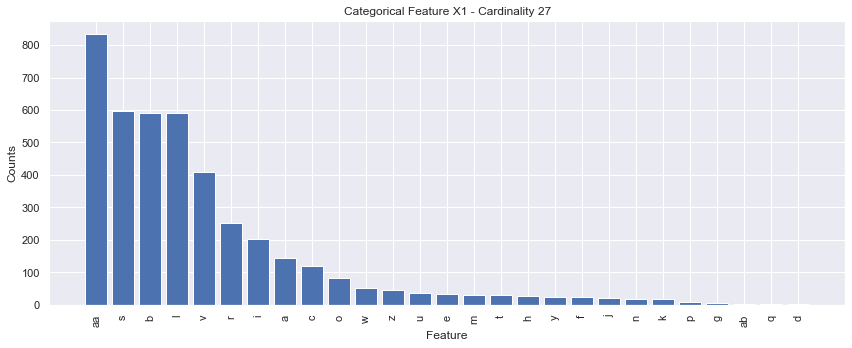

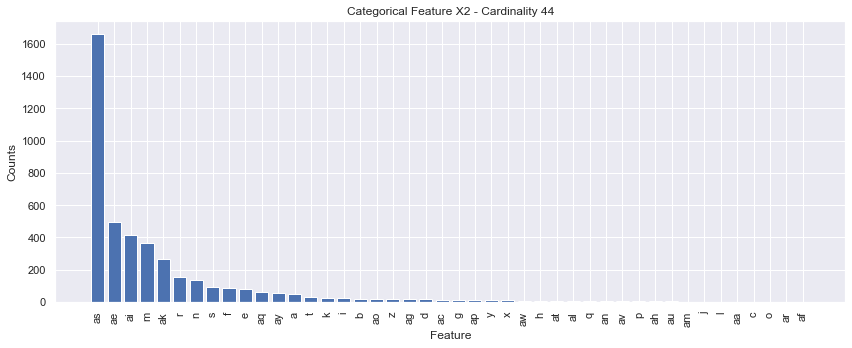

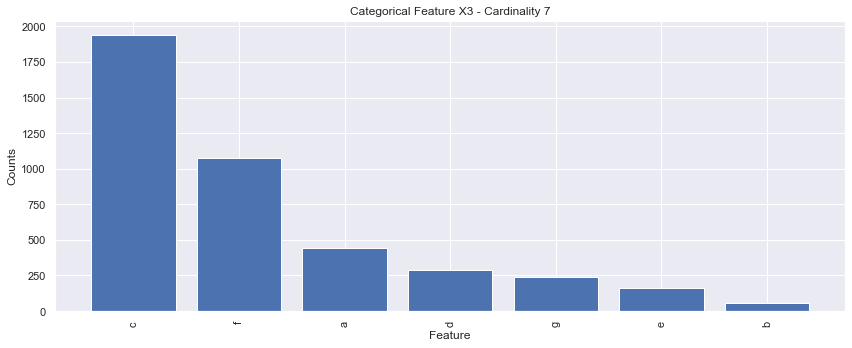

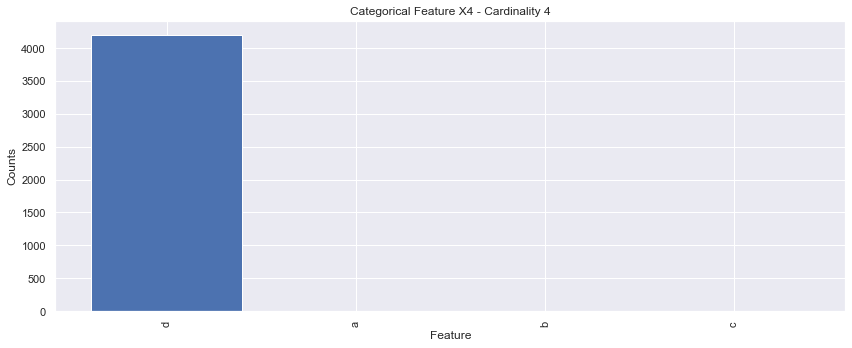

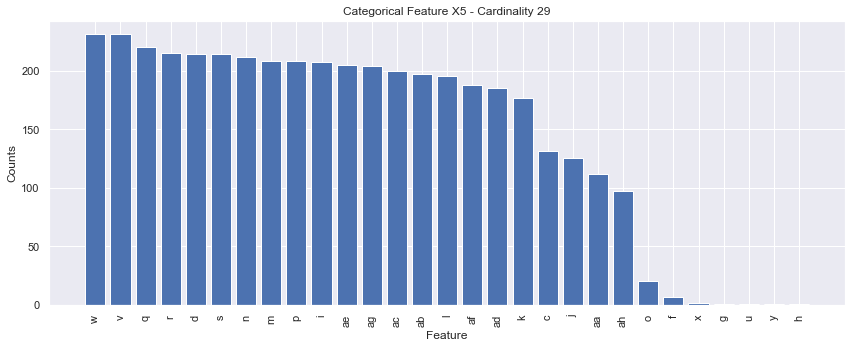

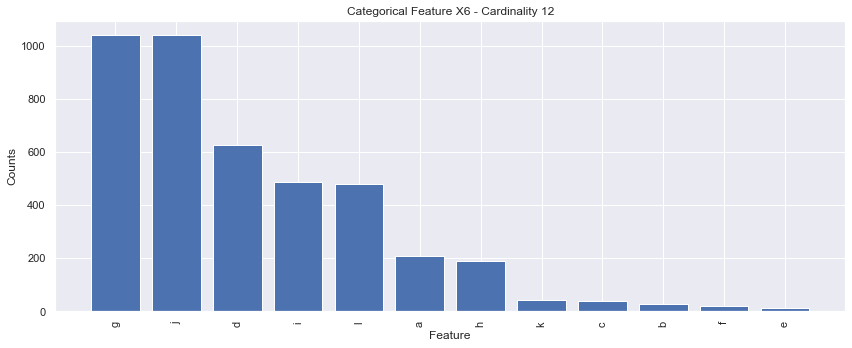

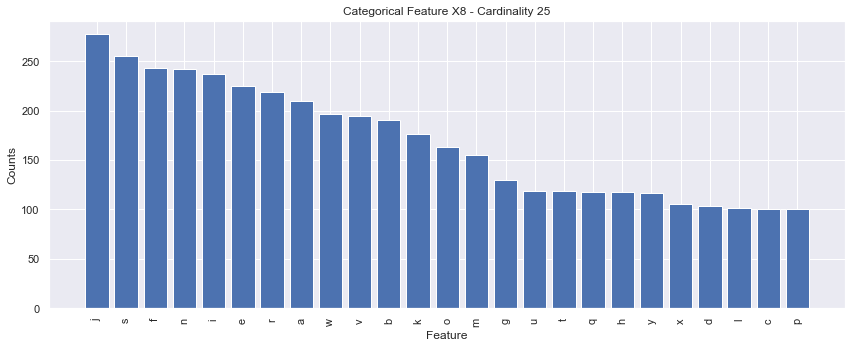

In [8]:
visuals = Plots(data)

Here, from the change in target value over the dataset AND the scatterplot of sorted values:

We see that the maximum target value (265.32) is an outlier. This may have an effect on the final model, so we shall get rid of that single observation.

We also created visuals to examine the cardinality of the Categorical Values. Improper coding of high Cardinality features could lead to poor model performance and memory issues when trying to fit the model.

Our solution for this will be to encode these with the Label Encoder.

Also, we shall check for null and unique values. In addition we will also check the dataset to see if any column has a variance of zero. A zero-variance column would indicate only zeros in that column and that will not be useful for our model.

We should also note that the number of features are incredibly high, so we will have to perform Dimensionality Reduction on the Dataset during Feature Engineering.

# Data Cleaning

In [9]:
#Checking for Zero std in columns:
zero_std = pd.DataFrame(data.train_df.std()==0)

In [10]:
zero_std.head()

,0
ID,False
y,False
X10,False
X11,True
X12,False


Now we find out how many of these features with 'True' status for zero std. 

In [11]:
zero_std.columns = ['status']
(zero_std.loc[zero_std['status']== True])

,status
X11,True
X93,True
X107,True
X233,True
X235,True
X268,True
X289,True
X290,True
X293,True
X297,True


We can now assign these features as invalid columns and drop them from the dataset.

We shall also proceed to drop the row with the outlier value.

In [27]:
invalid_cols = ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289','X290', 'X293', 'X297', 'X330', 'X347']
train_set = data.train_df.drop(columns = invalid_cols)
test_set = data.test_df.drop(columns = invalid_cols)

In [28]:
#Identifying the Row with the outlier target value:
data.train_df[data.train_df.y > 200]

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
883,1770,265.32,y,r,ai,f,d,ag,l,t,...,0,0,0,0,0,0,0,0,0,0


Having identified the row with the outlier target value, we will now remove it from the train_set:

In [29]:
train_set = train_set[train_set.y < 200]

# Feature Engineering

1. Now, we will proceed to encode the Categorical features  with Label Encoder.

In [32]:
cat_cols = ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
for col in cat_cols:
    le = LabelEncoder()
    le.fit(list(train_set[col].values))
    train_set[col] = le.transform(list(train_set[col].values))
    le.fit(list(test_set[col].values))
    test_set[col] = le.transform(list(test_set[col].values))

x_train = train_set.drop(['y','ID'], axis=1)

y_train = train_set['y'].values

x_test = test_set.drop(['ID'], axis=1)

### Dimensionality Reduction

2. Next, we will perform Dimensionality Reduction in order to reduce the features. We will use Principal Component Analysis. This will help in speeding up the training process.

Before we perform the PCA, we have to first scale the data. This is important because it helps to maximise the variance.

In [88]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(x_train)
x_train_normalized = scaler.transform(x_train)
x_test_normalized = scaler.transform(x_test)

In [89]:
pca = PCA(n_components = 0.99)

In [90]:
pca.fit(x_train_normalized)

PCA(copy=True, iterated_power='auto', n_components=0.99, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [91]:
print(x_train_normalized.shape)
x_train_transformed = pca.transform(x_train_normalized)
print(x_train_transformed.shape)

(4208, 364)
(4208, 36)


In [92]:
print(x_test_normalized.shape)
x_test_transformed = pca.transform(x_test_normalized)
print(x_test_transformed.shape)

(4209, 364)
(4209, 36)


In [93]:
pd.DataFrame(x_train_transformed)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.077952,-0.185860,0.014843,-0.101267,-0.078654,-0.099331,-0.090073,-0.034695,-0.011592,0.026112,...,0.004943,0.023972,0.024490,-0.006238,0.012720,-0.010257,-0.001052,-0.003471,0.015267,0.005992
1,0.094787,-0.184092,0.091333,-0.088165,-0.031258,-0.100026,-0.007134,-0.042217,0.004075,0.019520,...,-0.008419,0.003778,0.026760,0.000085,0.009063,-0.000034,-0.001333,-0.011915,0.001254,-0.006954
2,0.400469,-0.065014,0.082546,0.061465,-0.099094,-0.057085,-0.046247,-0.050712,0.005800,0.023997,...,0.004169,-0.002941,0.003975,-0.001739,-0.005747,-0.002100,0.013945,-0.008928,-0.003011,-0.001763
3,0.377160,0.039865,0.187839,-0.207969,0.008200,-0.046227,-0.003264,-0.076700,0.023683,0.011395,...,-0.009327,0.010150,-0.005342,-0.002958,-0.007342,-0.005025,0.001565,-0.003815,-0.006842,-0.015326
4,0.392154,0.138397,-0.078190,-0.057155,-0.139588,0.001693,0.023634,-0.044092,0.049435,-0.005553,...,0.000011,-0.004123,0.003810,-0.009471,-0.006909,-0.003148,-0.007905,0.005860,-0.000491,-0.009406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4203,0.481204,-0.022521,-0.414902,0.137987,-0.047851,0.087965,-0.028288,0.073351,-0.040150,0.010856,...,-0.005069,0.001533,-0.000770,-0.001007,-0.017513,-0.000324,-0.011606,-0.006293,-0.011022,0.008072
4204,0.180985,0.420451,-0.147383,-0.081874,-0.036210,0.006261,-0.020900,-0.042581,-0.009573,-0.012957,...,0.009684,-0.016097,0.006106,0.010825,-0.016174,0.003127,-0.007629,0.000916,-0.008310,-0.005448
4205,0.603988,0.358547,-0.196804,-0.143032,0.029737,0.123183,-0.096767,0.002106,-0.037068,-0.027912,...,-0.008378,-0.007124,0.003084,0.005135,-0.002118,0.004638,-0.005202,-0.007237,0.000847,0.007138
4206,0.497984,0.118671,-0.304409,0.220471,0.084337,-0.009278,0.009721,-0.097233,0.002723,-0.058708,...,-0.009648,-0.014940,0.004213,0.002436,-0.019016,0.012057,0.002415,0.007121,-0.000146,0.000701


# Training and Fitting the Model (XGBoost)

In [94]:
d_train = xgb.DMatrix(x_train_transformed, y_train)
d_test = xgb.DMatrix(x_test_transformed)

param = {'max_depth':4, 'eta':1, 'objective': 'reg:linear'}

#function credited to anokas (from Kaggle)
def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train')]
    
bst = xgb.train(param, d_train, 100, watchlist, early_stopping_rounds=50, feval=xgb_r2_score, maximize=True)

pred = bst.predict(d_test)

[23:56:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:9.70703	train-r2:0.38942
Multiple eval metrics have been passed: 'train-r2' will be used for early stopping.

Will train until train-r2 hasn't improved in 50 rounds.
[1]	train-rmse:9.00242	train-r2:0.47484
[2]	train-rmse:8.61776	train-r2:0.51876
[3]	train-rmse:8.40013	train-r2:0.54276
[4]	train-rmse:8.18851	train-r2:0.56551
[5]	train-rmse:8.03816	train-r2:0.58132
[6]	train-rmse:7.90983	train-r2:0.59458
[7]	train-rmse:7.70822	train-r2:0.61498
[8]	train-rmse:7.56199	train-r2:0.62945
[9]	train-rmse:7.40128	train-r2:0.64504
[10]	train-rmse:7.31952	train-r2:0.65284
[11]	train-rmse:7.23515	train-r2:0.66079
[12]	train-rmse:7.14559	train-r2:0.66914
[13]	train-rmse:7.03306	train-r2:0.67948
[14]	train-rmse:6.93291	train-r2:0.68854
[15]	train-rmse:6.81177	train-r2:0.69933
[16]	train-rmse:6.72035	train-r2:0.7

In [95]:
model_view = pd.DataFrame()
model_view['ID'] = test_set['ID'].values
model_view['Predicted y values'] = pred
model_view.to_csv('model.csv', index=False)

In [96]:
model_view.head(10)

,ID,Predicted y values
0,1,76.585678
1,2,87.491264
2,3,72.078773
3,4,74.055489
4,5,110.009026
5,8,86.074661
6,10,108.202324
7,11,104.676193
8,12,117.524673
9,14,98.222542
